# Creators:

Lazaros Gogos - AEM 3877

Christodoulos Zarogiannis - AEM 3868

---

The following code can plot points and rectangles, if given the output of the R\*-Tree directly taken from the `PrettyPrinter` class. The output must be assigned to the `results` variable, and when ran it will automatically plot the rectangles and the points that the R\*-Tree holds.

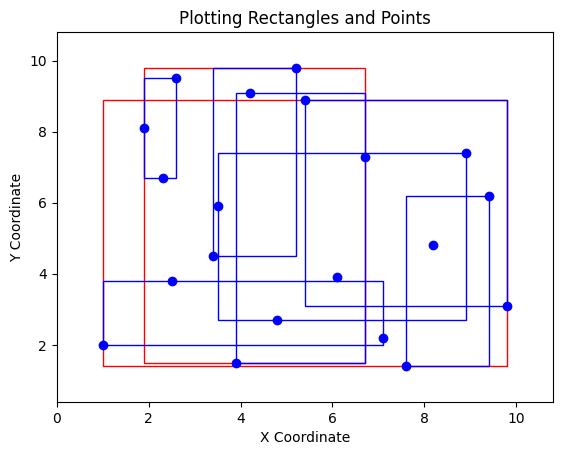

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# COPY AND PASTE THE EXACT OUTPUT OF THE PRETTY PRINTER HERE
# AND ASSIGN IT TO THE VARIABLE `results` AS SHOWN BELOW

results = "(1.0_10.0),(5.0_7.0),(3.0_8.0),(4.0_6.0),(2.0_5.0),(7.0_3.0),(6.0_9.0),(2.0_1.0),(9.0_2.0),(10.0_1.0)`\
0:[(1.0_7.0),(5.0_10.0)],0:[(2.0_5.0),(4.0_6.0)],0:[(2.0_1.0),(7.0_9.0)],0:[(9.0_1.0),(10.0_2.0)]"
# or
results = "(8.2_4.8),(9.8_3.1),(5.4_8.9),(3.5_5.9),(4.8_2.7),(6.1_3.9),(8.9_7.4),(1.0_2.0),(2.5_3.8),(7.1_2.2),(9.4_6.2),(7.6_1.4),(6.7_7.3),(4.2_9.1),(3.9_1.5),(5.2_9.8),(3.4_4.5),(2.3_6.7),(1.9_8.1),(2.6_9.5)`\
0:[(1.0_1.4),(9.8_8.9)],0:[(1.9_1.5),(6.7_9.8)],1:[(5.4_3.1),(9.8_8.9)],1:[(3.5_2.7),(8.9_7.4)],1:[(1.0_2.0),(7.1_3.8)],1:[(7.6_1.4),(9.4_6.2)],1:[(3.9_1.5),(6.7_9.1)],1:[(3.4_4.5),(5.2_9.8)],1:[(1.9_6.7),(2.6_9.5)]"

points_str = results.split("`")[0]
# print(points_str)
rectangles_str = results.split("`")[1]
# print(rectangles_str)


# Split the input string to separate individual rectangles
rectangles_list = rectangles_str.split("],")

# Create a figure and axis
fig, ax = plt.subplots()

# Initialize lists to store x and y coordinates
x_coords = []
y_coords = []

# Create a color map based on the number before ":"
color_map = {'0': 'red', '1': 'blue', '2' : 'green', '3': 'yellow'}  # You can add more colors if needed

# Iterate through each rectangle and plot it
for rect_str in rectangles_list:
    # Extract the color code and rectangle points
    color_code, points_str2 = rect_str.split(":")
    color = color_map.get(color_code, 'black')  # Default to black if color code not found

    # Extract the lower left and upper right points for each rectangle
    points = points_str2.strip("[]").split(",")
    lower_left_str, upper_right_str = points[0], points[1]
    lower_left_x, lower_left_y = map(float, lower_left_str.strip("()").split("_"))
    upper_right_x, upper_right_y = map(float, upper_right_str.strip("()").split("_"))

    # Calculate the width and height of each rectangle
    width = upper_right_x - lower_left_x
    height = upper_right_y - lower_left_y

    # Create a Rectangle patch and add it to the plot with the specified color
    rectangle = Rectangle((lower_left_x, lower_left_y), width, height, linewidth=1, edgecolor=color, facecolor='none')
    ax.add_patch(rectangle)

    # Append coordinates to the lists
    x_coords.extend([lower_left_x, upper_right_x])
    y_coords.extend([lower_left_y, upper_right_y])



# Split the input string to separate individual points
points_list = points_str.split(",")

# Iterate through each point and plot it
for point_str in points_list:
    x, y = map(float, point_str.strip("()").split("_"))
    plt.scatter(x, y, color="blue", marker="o")

    # Append coordinates to the lists
    x_coords.append(x)
    y_coords.append(y)

# Customize plot labels and title
plt.xlabel("X Coordinate")
plt.ylabel("Y Coordinate")
plt.title("Plotting Rectangles and Points")

# Calculate the axis limits to include all rectangles and points, with appropriate margins
x_min = min(x_coords) - 1
x_max = max(x_coords) + 1
y_min = min(y_coords) - 1
y_max = max(y_coords) + 1

ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Show the plot
# plt.grid(True)
plt.show()
